In [1]:
#imports
import numpy as np
import os
import math
from matplotlib import pyplot as plt
import cv2
from IPython.display import clear_output
print (cv2.__version__)

3.4.3


In [3]:
#take a picture
webcam = cv2.VideoCapture(0)
#ret , frame = webcam.read()

print(webcam,"Is opened",webcam.isOpened())
#webcam.release()

True
<VideoCapture 000001FB3E75ECD0> Is opened True


In [6]:
#open another window
#open another thread to handle external cv2 interaction
#cv2.startWindowThread()
#Create a window holder to show my image
cv2.namedWindow("Facial recoq system trial",cv2.WINDOW_AUTOSIZE)
while True:
    _ , frame = webcam.read()
    cv2.imshow("Facial recoq system trial",frame)

     #create a key to close the window.
        
    if cv2.waitKey(20) == 27:
        break
cv2.destroyAllWindows()


In [4]:
from IPython.display import clear_output
try:
    while True:
        _ , frame = webcam.read()
        plt.imshow(frame)
        plt.show()
        clear_output(wait=True)
except KeyboardInterrupt:
    print("Live video feed interrupted")  
webcam.release()

NameError: name 'webcam' is not defined

In [3]:
# display image in notebook using matplotlib
plt.imshow(frame)
plt.show()

NameError: name 'frame' is not defined

In [2]:
#displaying a video in another window
video = cv2.VideoCapture("X:\Hunter.Killer.2018.720p.WEB-DL.MkvCage.ws.mkv.mp4")
print(video.isOpened())
cv2.namedWindow("Hunter Killer movie",cv2.WINDOW_AUTOSIZE)
while video.isOpened():
    ret ,frame = video.read()
    if not ret:
        break
    cv2.imshow("Hunter Killer movie",frame)
    if cv2.waitKey(40) == 27:
        break
video.release()
cv2.destroyAllWindows()

True


In [3]:
# now on to face detection using Haar feature cascade algorithm
class VideoCamera(object):
    def __init__(self,index=0):
        self.video = cv2.VideoCapture(index)
        self.index = index
        print(self.video.isOpened())
        
    def __del__(self):
        self.video.release()
    def get_frame(self,in_grayscale=False):
        _,frame = self.video.read()
        if in_grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame

In [2]:
#define face detector
class FaceDetector(object):
    def __init__(self,xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    def detect(self,image,biggest_only=True):
        #detector  = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
        #detector  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30,30)
        biggest_only = True
        #print(frame)
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                   cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                   cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,scaleFactor=scale_factor,minNeighbors=min_neighbors,minSize=min_size,flags=flags)
        return faces_coord    


In [4]:
webcam = VideoCamera()
detector = FaceDetector('haarcascade_frontalface_alt.xml')
#detector  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

True


In [5]:
#draw a rectangle around my face
try:
    while True:
        frame = webcam.get_frame()
        frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_coord = detector.detect(frame1)   
        for(x,y,w,h) in faces_coord:
            cv2.rectangle(frame1, (x,y),(x+w,y+h),(150,150,0),8)
        plt.imshow(frame1)
        plt.show()
        clear_output(wait=True)
except KeyboardInterrupt:
    print("Live video feed interrupted")

Live video feed interrupted


In [5]:
#normalize images to maximize accuracy
def cut_faces(image, faces_choord):
    faces = []
    for(x,y,w,h) in faces_choord:
        w_rm = int(0.2*w/2)
        faces.append(image[y: y+h , x+w_rm: x+w-w_rm])
    return faces

In [25]:
#display the cut faces
try:
    while True:
        frame = webcam.get_frame()
        #frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_coord = detector.detect(frame)   
        if len(faces_coord):
            #print(faces_coord)
            faces = cut_faces(frame, faces_coord)
            #print(faces)
            plt.imshow(faces[0])
            plt.sh
            ow()
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Live video feed interrupted")

Live video feed interrupted


In [6]:
#normalize pixel intensity
def normalize_intensity(images):
    images_norm = []    
    for image in images:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm

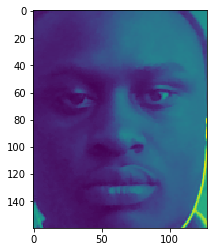

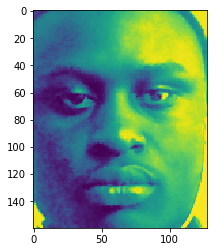

In [32]:
face_bw = cv2.cvtColor(faces[0],cv2.COLOR_BGR2GRAY)
face_bw_eq = cv2.equalizeHist(face_bw)
plt.imshow(face_bw)
plt.show()
plt.imshow(face_bw_eq)
plt.show()

In [39]:
#dispay the image once faces are cut and pixel intensity has been normalized
try:
    while True:
        frame = webcam.get_frame()
        #frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_coord = detector.detect(frame)   
        if len(faces_coord):
            #print(faces_coord)
            faces = cut_faces(frame, faces_coord)
            faces = normalize_intensity(faces)
            #print(faces)
            plt.imshow(faces[0])
            plt.show()
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Live video feed interrupted")

Live video feed interrupted


In [7]:
# define a function to resize the images
def resize(images, size=( 50, 50)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image,size, interpolation = cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image,size, interpolation = cv2.INTER_CUBIC)
        images_norm.append(image_norm)
    return images_norm

In [43]:
#dispay the image once faces are cut and pixel intensity has been normalized and resized
try:
    while True:
        frame = webcam.get_frame()
        #frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces_coord = detector.detect(frame)   
        if len(faces_coord):
            #print(faces_coord)
            faces = cut_faces(frame, faces_coord)
            faces = normalize_intensity(faces)
            faces = resize(faces)
            #print(faces)
            plt.imshow(faces[0])
            plt.show()
            clear_output(wait=True)
except KeyboardInterrupt:
    print("Live video feed interrupted")

Live video feed interrupted


<Figure size 432x288 with 0 Axes>

In [8]:
#functions to draw rectangle and normalize the faces

def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

def draw_rectangle(image, coords):
    for (x,y,w,h) in coords:
        w_rm = int(0.2 * w/2)
        cv2.rectangle(image,(x+w_rm,y),(x+w-w_rm,y+h),(150,150,0),8)

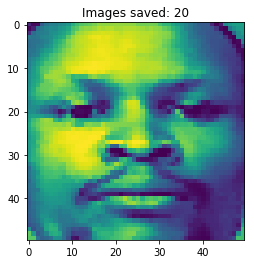

In [8]:
#create dataset

folder = "people/" + input('Person: '.lower())
#input name
cv2.namedWindow("Facial Recoq",cv2.WINDOW_AUTOSIZE)
if not os.path.exists(folder):
    print(folder)
    os.makedirs(folder)
    counter =0
    timer = 0
    while counter <= 20:
        frame = webcam.get_frame()
        faces_coord = detector.detect(frame)
        if len(faces_coord) and timer % 700==50:
            faces = normalize_faces(frame, faces_coord)
            cv2.imwrite(folder + '/' + str(counter) + '.jpg', faces[0])
            plt.title("Images saved: " +str(counter))
            plt.imshow(faces[0])
            plt.show()
            clear_output(wait = True)
            counter += 1
        draw_rectangle(frame, faces_coord)
        cv2.imshow("Facial Recoq", frame)
        cv2.waitKey(50)
        timer += 50
    cv2.destroyAllWindows()
else:
    print("This name already exists")        

In [11]:
del webcam

In [2]:
# a compressed version of the above recoqnition system
# it has a complete recoqnition model
#imports
import numpy as np
import os
import math
from matplotlib import pyplot as plt
import cv2
from IPython.display import clear_output
print (cv2.__version__)



# now on to face detection using Haar feature cascade algorithm
class VideoCamera(object):
    def __init__(self,index=0):
        self.video = cv2.VideoCapture(index)
        self.index = index
        print(self.video.isOpened())
        
    def __del__(self):
        self.video.release()
    def get_frame(self,in_grayscale=False):
        _,frame = self.video.read()
        if in_grayscale:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        return frame
    
#define face detector
class FaceDetector(object):
    def __init__(self,xml_path):
        self.classifier = cv2.CascadeClassifier(xml_path)
    def detect(self,image,biggest_only=True):
        #detector  = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
        #detector  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
        scale_factor = 1.2
        min_neighbors = 5
        min_size = (30,30)
        biggest_only = True
        #print(frame)
        flags = cv2.CASCADE_FIND_BIGGEST_OBJECT | \
                   cv2.CASCADE_DO_ROUGH_SEARCH if biggest_only else \
                   cv2.CASCADE_SCALE_IMAGE
        faces_coord = self.classifier.detectMultiScale(image,scaleFactor=scale_factor,minNeighbors=min_neighbors,minSize=min_size,flags=flags)
        return faces_coord   

#initialize webcam incident   
webcam = VideoCamera()
detector = FaceDetector('haarcascade_frontalface_alt.xml')
#detector  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')



#normalize images to maximize accuracy
def cut_faces(image, faces_choord):
    faces = []
    for(x,y,w,h) in faces_choord:
        w_rm = int(0.2*w/2)
        faces.append(image[y: y+h , x+w_rm: x+w-w_rm])
    return faces

#normalize pixel intensity
def normalize_intensity(images):
    images_norm = []    
    for image in images:
        is_color = len(image.shape) == 3
        if is_color:
            image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        images_norm.append(cv2.equalizeHist(image))
    return images_norm
# define a function to resize the images
def resize(images, size=( 50, 50)):
    images_norm = []
    for image in images:
        if image.shape < size:
            image_norm = cv2.resize(image,size, interpolation = cv2.INTER_AREA)
        else:
            image_norm = cv2.resize(image,size, interpolation = cv2.INTER_CUBIC)
        images_norm.append(image_norm)
    return images_norm
#functions to draw rectangle and normalize the faces

def normalize_faces(frame, faces_coord):
    faces = cut_faces(frame, faces_coord)
    faces = normalize_intensity(faces)
    faces = resize(faces)
    return faces

def draw_rectangle(image, coords):
    for (x,y,w,h) in coords:
        w_rm = int(0.2 * w/2)
        cv2.rectangle(image,(x+w_rm,y),(x+w-w_rm,y+h),(150,150,0),8)
#del webcam

4.0.0
True


In [9]:
def collect_dataset():
    images = []
    labels = []
    labels_dict = {}
    people = [person for person in os.listdir("people/")]
    for i, person in enumerate(people):
        labels_dict[i]= person
        for image in os.listdir('people/' + person):
            images.append(cv2.imread("people/" + person + '/' + image,0))
            labels.append(i)
    return (images, np.array(labels), labels_dict)

In [10]:
images, labels, labels_dict = collect_dataset()
rec_eig = cv2.face.EigenFaceRecognizer_create()
rec_eig.train(images,labels)

rec_fisher = cv2.face.FisherFaceRecognizer_create()
rec_fisher.train(images,labels)

rec_lbph = cv2.face.LBPHFaceRecognizer_create()
rec_lbph.train(images,labels)

print("Models trained successfully")

Models trained successfully


True


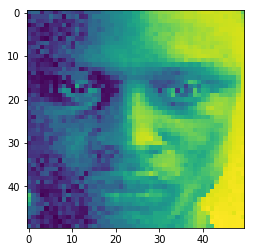

In [6]:
webcam = VideoCamera()
frame = webcam.get_frame()
detector = FaceDetector("haarcascade_frontalface_alt.xml")
frame = webcam.get_frame()
faces_coord = detector.detect(frame)
faces = normalize_faces(frame, faces_coord)
face = faces[0]
plt.imshow(face)
plt.show()
del webcam

In [5]:
collector  = cv2.face.StandardCollector_create()
# using eigen vectors predictor
rec_eig.predict_collect(face,collector)
conf = collector.getMinDist()
pred = collector.getMinLabel()
print("Eigen faces -> prediction: " + labels_dict[pred].capitalize())
print("Confidence -> "+str(round(conf)))

# using fisher model for prediction
rec_fisher.predict_collect(face,collector)
conf = collector.getMinDist()
pred = collector.getMinLabel()
print("Fisher faces -> prediction: " + labels_dict[pred].capitalize())
print("Confidence -> "+str(round(conf)))

# using lbph
rec_lbph.predict_collect(face,collector)
conf = collector.getMinDist()
pred = collector.getMinLabel()
print("LBPH faces -> prediction: " + labels_dict[pred].capitalize())
print("Confidence -> "+str(round(conf)))

NameError: name 'face' is not defined

In [11]:
cv2.namedWindow("Facial Recoq live", cv2.WINDOW_AUTOSIZE)
while True:
    frame = webcam.get_frame()
    faces_coord = detector.detect(frame, True)
    if len(faces_coord):
        faces = normalize_faces(frame, faces_coord)
        for i, face in enumerate(faces):
            collector = cv2.face.StandardCollector_create()
            rec_eig.predict_collect(face, collector)
            conf = collector.getMinDist()
            pred = collector.getMinLabel()
            threshold = 140
            print("Prediction: ",labels_dict[pred].capitalize())
            print("Confidence: ",conf)
            cv2.putText(frame,labels_dict[pred].capitalize()
                        ,(faces_coord[i][0],faces_coord[i][1]-10),
                        cv2.FONT_HERSHEY_PLAIN,1.3,(66,53,243),2
                        ,cv2.LINE_AA)
        clear_output(wait = True)
        draw_rectangle(frame, faces_coord)
    cv2.putText(frame,"ESC to escape",(5, frame.shape[0]-5),
               cv2.FONT_HERSHEY_PLAIN,1,(66,53,243),2,cv2.LINE_AA)
    cv2.imshow("Facial Recoq live",frame)
    if cv2.waitKey(40) == 27:
        cv2.destroyAllWindows()
        break

Prediction:  Felix
Confidence:  1612.13098138294
